# **Customer Churn Prediction**
Customer Churn refers to the customers that have left your business or the customers a business failed to attract anymore. In this project we will take a look at customer churn data of a telecom company and we will try to analyze that what makes customer leave the business and we will make a model to predict if a fresh customer is likely to leave the business or not on the basis of past data present.


We will make the model using a deep learning method called as Artificial Neural Networks or ANNs. We will perform neccesary data manipulation, preprocessing and analysis to make our model more accurate.

**Importing neccesary libraries and modules**

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


**Get the data**

In [4]:
df = pd.read_csv('data.csv') # reads the csv file
df.head() # shows the first 5 rows

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Exploratory Data Analysis and Data Preprocessing**

In [5]:
# print the number of columns and rows of the dataset
data_shape = df.shape
print("Number of rows in data: ",data_shape[0])
print("Number of columns in data: ",data_shape[1])

Number of rows in data:  7043
Number of columns in data:  21


Get the basic information about the data


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [47]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2265.000258
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1400.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
# change the dtypes of neccesary columns
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [8]:
df['TotalCharges'].dtype

dtype('float64')

Look for any missing data

In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# dataframe of the missing values
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [12]:
# we can replace the null values with with either mean median or mode
df['TotalCharges'].fillna(df['TotalCharges'].mean(),inplace=True)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Now we have dealt with the missing values and false dtypes, now we will explore and visualize the data

<Axes: xlabel='Churn', ylabel='count'>

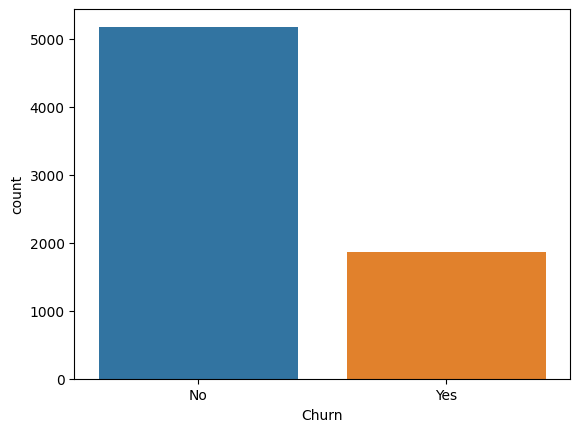

In [27]:
# visualize the churn
sns.countplot(df,x='Churn')

We can see the number of customers leaving the business is less half the number of people that are staying

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

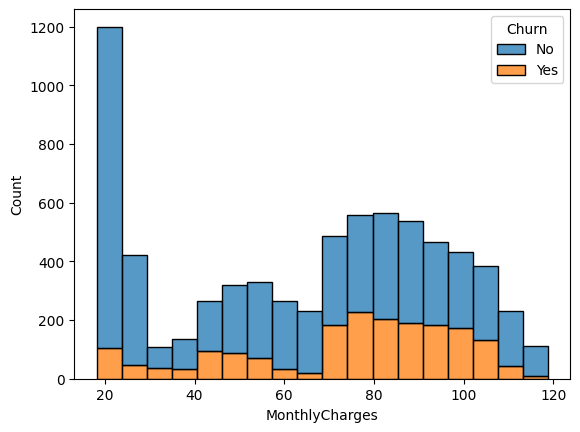

In [39]:
# does churn depend on monthly charges
sns.histplot(data=df,x='MonthlyCharges',hue='Churn',multiple='stack')

We can see most people who are leaving has a monthly bill of more than $65

<Axes: xlabel='tenure', ylabel='TotalCharges'>

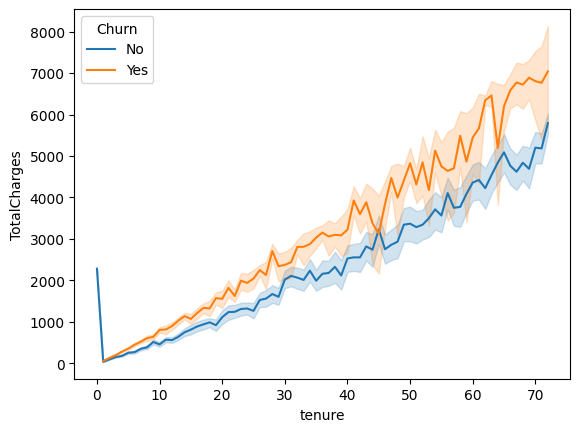

In [42]:
# tenure and monthly charges of people who are leaving and staying
sns.lineplot(data=df,x='tenure',y='TotalCharges',hue='Churn')

The people who are leaving have significantly higher total charges and their average tenure is 33 months

**Data Manipulation and Preprocessing**

Convert categorical columns into numeric columns

In [48]:
# replace male with 1 and female with 0 in gender column
df['gender'].replace({'Male':1,'Female':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [50]:
# replace yes with 1 and no with 0 in yes/no columns
for col in df.columns:
  if df[col].dtypes=='object':
    print(col," : ",df[col].unique())


Partner  :  ['Yes' 'No']
Dependents  :  ['No' 'Yes']
PhoneService  :  ['No' 'Yes']
MultipleLines  :  ['No phone service' 'No' 'Yes']
InternetService  :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  ['No' 'Yes' 'No internet service']
OnlineBackup  :  ['Yes' 'No' 'No internet service']
DeviceProtection  :  ['No' 'Yes' 'No internet service']
TechSupport  :  ['No' 'Yes' 'No internet service']
StreamingTV  :  ['No' 'Yes' 'No internet service']
StreamingMovies  :  ['No' 'Yes' 'No internet service']
Contract  :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  ['Yes' 'No']
PaymentMethod  :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  ['No' 'Yes']


In [51]:
yes_no_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in yes_no_cols:
  df[col].replace({'Yes':1,'No':0},inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [54]:
# use get_dummies method to deal with remaining categorical features
cat_cols = list(df.select_dtypes(include='object'))
df = pd.get_dummies(data=df,columns=cat_cols)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


Now we are done with data preprocessing and data manipulation

**Train Test Split and Handling Imbalance**

In [60]:
# split the data into train and test sets
X = df.drop(['Churn'],axis='columns')
y=df['Churn']
X.shape

(7043, 40)

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=100)

In [64]:
y_train.value_counts()

0    3902
1    1380
Name: Churn, dtype: int64

Here we can see there is some imbalance in the dataset, to handle this imbalance we will use a technique known as Synthetic Minority Over Sampling Technique or SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

y_train_sm.value_counts()

0    3902
1    3902
Name: Churn, dtype: int64

Now we have equal number of classes in the training set, now the train data is ready to use

**Model Building and Training**

Build a deep learning model

In [86]:
model = keras.Sequential([
    keras.layers.Dense(32,activation='relu',input_shape=(40,)),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.15),
    keras.layers.Dense(8,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
# print the model summary

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                1312      
                                                                 
 batch_normalization_3 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dropout_10 (Dropout)        (None, 32)                0         
                                                                 
 dense_19 (Dense)            (None, 8)                 264       
                                                                 
 dense_20 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1713 (6.69 KB)
Trainable params: 1649 (6.44 KB)
Non-trainable params: 64 (256.00 Byte)
___________________

In [87]:
# compile the model
model.compile(optimizer='adam',
               loss='binary_crossentropy',
               metrics=['accuracy'])
# train the model
history = model.fit(X_train_sm,y_train_sm,epochs=20)

Epoch 1/20
244/244 [==============================] - 7s 5ms/step - loss: 0.6102 - accuracy: 0.6643
Epoch 2/20
244/244 [==============================] - 1s 4ms/step - loss: 0.5416 - accuracy: 0.7285
Epoch 3/20
244/244 [==============================] - 1s 4ms/step - loss: 0.5243 - accuracy: 0.7363
Epoch 4/20
244/244 [==============================] - 1s 4ms/step - loss: 0.5037 - accuracy: 0.7587
Epoch 5/20
244/244 [==============================] - 1s 4ms/step - loss: 0.4896 - accuracy: 0.7652
Epoch 6/20
244/244 [==============================] - 1s 4ms/step - loss: 0.4696 - accuracy: 0.7799
Epoch 7/20
244/244 [==============================] - 1s 4ms/step - loss: 0.4410 - accuracy: 0.8007
Epoch 8/20
244/244 [==============================] - 1s 5ms/step - loss: 0.4310 - accuracy: 0.7983
Epoch 9/20
244/244 [==============================] - 2s 7ms/step - loss: 0.4316 - accuracy: 0.7960
Epoch 10/20
244/244 [==============================] - 1s 6ms/step - loss: 0.4164 - accuracy: 0.8086

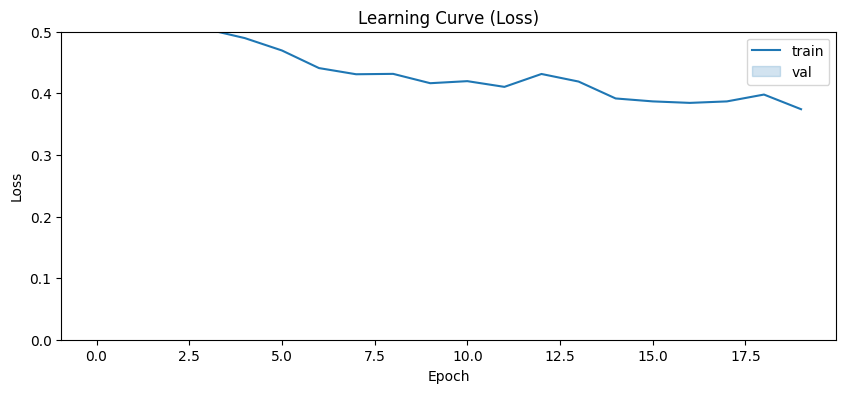

In [96]:
# plot the loss vs epoch curve
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

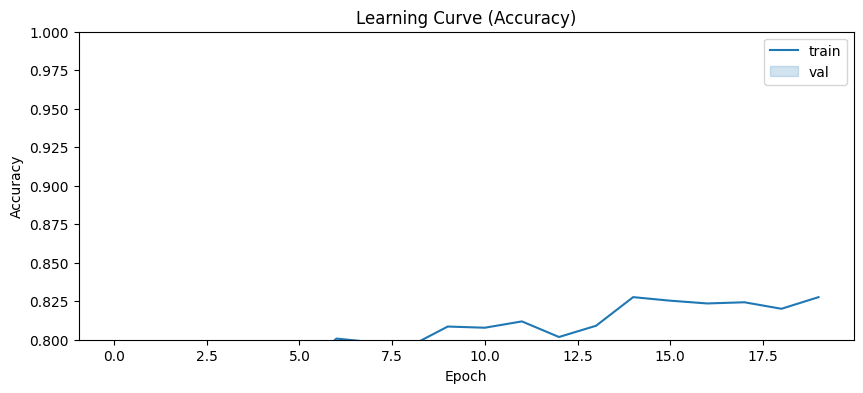

In [95]:
# plot accuracy vs epoch
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(x = history.epoch, y = history.history['accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

**Performance Metrics**

In [98]:
# print test loss and test accuracy
evaluation = model.evaluate(X_test,y_test)
print("Test loss: ",evaluation[0])
print("Test accuracy: ",evaluation[1]*100,"%")

56/56 [==============================] - 0s 4ms/step - loss: 0.4648 - accuracy: 0.7694
Test loss:  0.46482542157173157
Test accuracy:  76.94491744041443 %


We have got an accuracy of 77%, the reason for a low accuracy is that deep learning works well on huge datasets with thousands of training examples

In [100]:
# print classification report
y_predict = model.predict(X_test)
y_pred = []
for i in y_predict:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)
print(classification_report(y_test,y_pred))

56/56 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.81      0.88      0.85      1272
           1       0.61      0.48      0.53       489

    accuracy                           0.77      1761
   macro avg       0.71      0.68      0.69      1761
weighted avg       0.76      0.77      0.76      1761

